In [1]:
# !pip install numpy
# !pip install pandas
# !pip install mplfinance
# !pip install pandas-datareader
# !pip install requests_cache
# !pip install tqdm
# !pip install alphaVantage-api # Required for Watchlist


[notice] A new release of pip available: 22.3.1 -> 23.3
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3.1 -> 23.3
[notice] To update, run: python.exe -m pip install --upgrade pip


     ---------------------------------------- 75.0/75.0 kB 1.0 MB/s eta 0:00:00



[notice] A new release of pip available: 22.3.1 -> 23.3
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3.1 -> 23.3
[notice] To update, run: python.exe -m pip install --upgrade pip


     ---------------------------------------- 60.1/60.1 kB ? eta 0:00:00
     ---------------------------------------- 50.8/50.8 kB 1.3 MB/s eta 0:00:00



[notice] A new release of pip available: 22.3.1 -> 23.3
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3.1 -> 23.3
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: Invalid requirement: '#'

[notice] A new release of pip available: 22.3.1 -> 23.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
%pylab inline
import datetime as dt
import random as rnd
from sys import float_info as sflt

from tqdm import tqdm

import numpy as np
import pandas as pd

pd.options.display.max_rows = 100
pd.options.display.max_columns = 20


import mplfinance as mpf
import pandas_ta as ta

from tqdm.notebook import trange, tqdm

from watchlist import colors, Watchlist # Is this failing? If so, copy it locally. See above.

print(f"Numpy v{np.__version__}")
print(f"Pandas v{pd.__version__}")
print(f"mplfinance v{mpf.__version__}")
print(f"\nPandas TA v{ta.version}\nTo install the Latest Version:\n$ pip install -U git+https://github.com/twopirllc/pandas-ta\n")
%matplotlib inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib
Numpy v1.26.1
Pandas v2.1.1
mplfinance v0.12.10b0

Pandas TA v0.3.14b0
To install the Latest Version:
$ pip install -U git+https://github.com/twopirllc/pandas-ta



In [4]:
def recent_bars(df, tf: str = "1y"):
    # All Data: 0, Last Four Years: 0.25, Last Two Years: 0.5, This Year: 1, Last Half Year: 2, Last Quarter: 4
    yearly_divisor = {"all": 0, "10y": 0.1, "5y": 0.2, "4y": 0.25, "3y": 1./3, "2y": 0.5, "1y": 1, "6mo": 2, "3mo": 4}
    yd = yearly_divisor[tf] if tf in yearly_divisor.keys() else 0
    return int(ta.RATE["TRADING_DAYS_PER_YEAR"] / yd) if yd > 0 else df.shape[0]

In [5]:
tf = "D"
tickers = ["SPY", "QQQ", "AAPL", "TSLA", "BTC-USD"]
watch = Watchlist(tickers, tf=tf, ds_name="yahoo", timed=True)
# watch.strategy = ta.CommonStrategy # If you have a Custom Strategy, you can use it here.
watch.load(tickers, analyze=True, verbose=False)

[!] Loading All: SPY, QQQ, AAPL, TSLA, BTC-USD
[i] Loaded SPY[D]: SPY_D.csv
[i] Runtime: 868.3160 ms (0.8683 s)
[+] Downloading[yahoo]: QQQ[D]
[+] Saving: C:\Users\Arjun\av_data/QQQ_D.csv
[i] Runtime: 833.3208 ms (0.8333 s)
[+] Downloading[yahoo]: AAPL[D]
[+] Saving: C:\Users\Arjun\av_data/AAPL_D.csv
[i] Runtime: 799.4712 ms (0.7995 s)
[+] Downloading[yahoo]: TSLA[D]
[+] Saving: C:\Users\Arjun\av_data/TSLA_D.csv
[i] Runtime: 872.1887 ms (0.8722 s)
[+] Downloading[yahoo]: BTC-USD[D]
[+] Saving: C:\Users\Arjun\av_data/BTC-USD_D.csv
[i] Runtime: 762.7654 ms (0.7628 s)


In [6]:
ticker = tickers[0] # change tickers by changing the index
print(f"{ticker} {watch.data[ticker].shape}\nColumns: {', '.join(list(watch.data[ticker].columns))}")

SPY (6030, 10)
Columns: open, high, low, close, volume, SMA_10, SMA_20, SMA_50, SMA_200, VOL_SMA_20


In [7]:
duration = "1y"
asset = watch.data[ticker]
recent = recent_bars(asset, duration)
asset.columns = asset.columns.str.lower()
asset.drop(columns=["dividends", "split"], errors="ignore", inplace=True)
asset = asset.copy().tail(recent)
asset

,open,high,low,close,volume,sma_10,sma_20,sma_50,sma_200,vol_sma_20
date,,,,,,,,,,
2022-10-18,375.13,375.450,367.52,371.13,97162850.0,364.895,366.5640,390.7266,414.05830,1.036644e+08
2022-10-19,368.99,371.850,365.55,368.50,79746863.0,364.036,366.1195,389.8696,413.51225,1.023144e+08
2022-10-20,368.03,372.670,364.61,365.41,88283087.0,363.257,365.6790,388.7780,412.95155,1.023553e+08
2022-10-21,365.12,374.800,363.54,374.29,131038379.0,364.407,365.9960,387.8640,412.48110,1.027899e+08
2022-10-24,375.89,380.060,373.11,378.87,85436907.0,366.292,366.7240,386.8994,412.03575,1.024327e+08
...,...,...,...,...,...,...,...,...,...,...
2023-10-12,436.95,437.335,431.23,433.66,81154230.0,429.189,431.7365,439.7914,420.83135,8.808690e+07
2023-10-13,435.21,436.450,429.88,431.50,95201132.0,429.591,431.1430,439.4446,421.08185,8.725452e+07
2023-10-16,433.82,437.140,433.57,436.04,75433194.0,430.464,430.7635,439.2292,421.37875,8.823857e+07


In [8]:
# Example Long Trends
# long = ta.sma(asset.close, 50) > ta.sma(asset.close, 200) # SMA(50) > SMA(200) "Golden/Death Cross"
# long = ta.sma(asset.close, 10) > ta.sma(asset.close, 20) # SMA(10) > SMA(20)
long = ta.ema(asset.close, 8) > ta.ema(asset.close, 21) # EMA(8) > EMA(21)
# long = ta.increasing(ta.ema(asset.close, 50))
# long = ta.macd(asset.close).iloc[:,1] > 0 # MACD Histogram is positive
# long = ta.amat(asset.close, 50, 200).AMATe_LR_2  # Long Run of AMAT(50, 200) with lookback of 2 bars

# long &= ta.increasing(ta.ema(asset.close, 50), 2) # Uncomment for further long restrictions, in this case when EMA(50) is increasing/sloping upwards
# long = 1 - long # uncomment to create a short signal of the trend

asset.ta.ema(length=8, sma=False, append=True)
asset.ta.ema(length=21, sma=False, append=True)
asset.ta.ema(length=50, sma=False, append=True)
asset.ta.percent_return(append=True)
print("TA Columns Added:")
asset[asset.columns[5:]].tail()

TA Columns Added:


,sma_10,sma_20,sma_50,sma_200,vol_sma_20,EMA_8,EMA_21,EMA_50,PCTRET_1
date,,,,,,,,,
2023-10-12,429.189,431.7365,439.7914,420.83135,88086904.95,431.795617,433.200296,436.877486,-0.006096
2023-10-13,429.591,431.1430,439.4446,421.08185,87254518.60,431.729925,433.045723,436.666604,-0.004981
2023-10-16,430.464,430.7635,439.2292,421.37875,88238567.65,432.687719,433.317930,436.642032,0.010521
2023-10-17,431.907,430.4290,438.9354,421.64165,88679070.65,433.428226,433.563573,436.617638,-0.000046
2023-10-18,432.484,430.0185,438.5690,421.88165,89221231.50,432.761954,433.278703,436.374986,-0.012821


In [9]:
trendy = asset.ta.tsignals(long, asbool=False, append=True)
trendy.tail()

,TS_Trends,TS_Trades,TS_Entries,TS_Exits
date,,,,
2023-10-12,0,0,0,0
2023-10-13,0,0,0,0
2023-10-16,0,0,0,0
2023-10-17,0,0,0,0
2023-10-18,0,0,0,0


In [17]:
entries = trendy.TS_Entries * asset.close
entries = entries[~np.isclose(entries, 0)]
entries.dropna(inplace=True)
entries.name = "Entry"

exits = trendy.TS_Exits * asset.close
exits = exits[~np.isclose(exits, 0)]
exits.dropna(inplace=True)
exits.name = "Exit"

total_trades = trendy.TS_Trades.abs().sum()
rt_trades = int(trendy.TS_Trades.abs().sum() // 2)

all_trades = trendy.TS_Trades.copy().fillna(0)
all_trades = all_trades[all_trades != 0]

trades = pd.DataFrame({
    "Signal": all_trades,
    entries.name: entries,
    exits.name: exits
})

# Show some stats if there is an active trade (when there is an odd number of round trip trades)
if total_trades % 2 != 0:
    unrealized_pnl = asset.close.iloc[-1] - entries.iloc[-1]
    unrealized_pnl_pct_change = 100 * ((asset.close.iloc[-1] / entries.iloc[-1]) - 1)
    print("Current Trade:")
    print(f"Price Entry | Last:\t{entries.iloc[-1]:.4f} | {asset.close.iloc[-1]:.4f}")
    print(f"Unrealized PnL | %:\t{unrealized_pnl:.4f} | {unrealized_pnl_pct_change:.4f}%")
print(f"\nTrades Total | Round Trip:\t{total_trades} | {rt_trades}")
print(f"Trade Coverage: {100 * asset.TS_Trends.sum() / asset.shape[0]:.2f}%")

trades


Trades Total | Round Trip:	8 | 4
Trade Coverage: 61.51%


,Signal,Entry,Exit
date,,,
2022-11-15,1,398.49,NaN
2022-12-16,-1,NaN,383.27
2023-01-11,1,395.52,NaN
2023-02-23,-1,NaN,400.66
2023-03-29,1,401.35,NaN
2023-08-10,-1,NaN,445.91
2023-08-30,1,451.01,NaN
2023-09-18,-1,NaN,443.63


# Visualization

In [11]:
extime = ta.get_time(to_string=True)
first_date, last_date = asset.index[0], asset.index[-1]
f_date = f"{first_date.day_name()} {first_date.month}-{first_date.day}-{first_date.year}"
l_date = f"{last_date.day_name()} {last_date.month}-{last_date.day}-{last_date.year}"
last_ohlcv = f"Last OHLCV: ({asset.iloc[-1].open:.4f}, {asset.iloc[-1].high:.4f}, {asset.iloc[-1].low:.4f}, {asset.iloc[-1].close:.4f}, {int(asset.iloc[-1].volume)})"
ptitle = f"\n{ticker} [{tf} for {duration}({recent} bars)] from {f_date} to {l_date}\n{last_ohlcv}\n{extime}"


<Axes: title={'center': '\nSPY [D for 1y(252 bars)] from Tuesday 10-18-2022 to Wednesday 10-18-2023\nLast OHLCV: (434.1100, 435.1800, 429.0900, 430.4300, 93405819)\nWednesday October 18, 2023, NYSE: 13:33:23, Local: 17:33:23 Central Daylight Time, Day 291/365 (80.00%)'}, xlabel='date'>

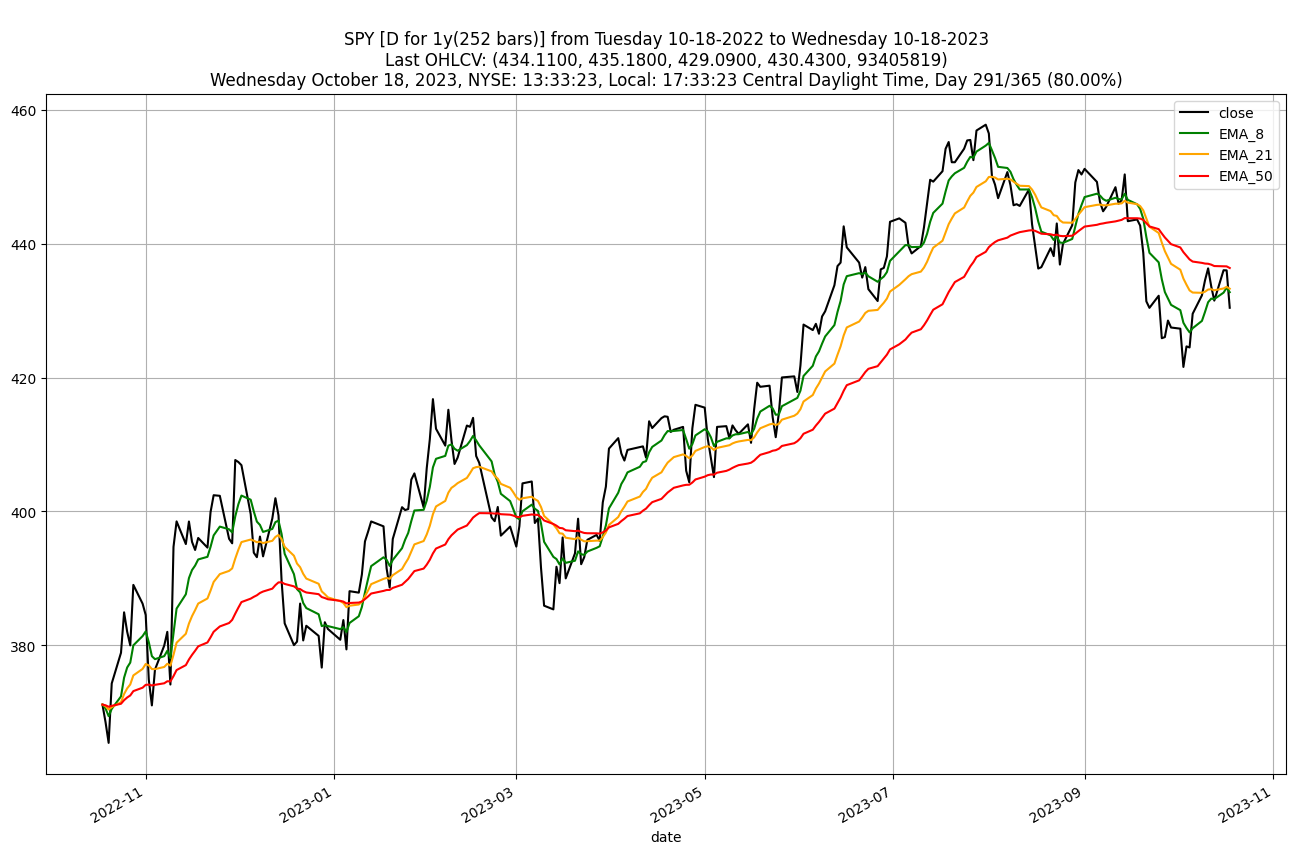

In [12]:
# chart = asset["close"] #asset[["close", "SMA_10", "SMA_20", "SMA_50", "SMA_200"]]
# chart = asset[["close", "SMA_10", "SMA_20"]]
chart = asset[["close", "EMA_8", "EMA_21", "EMA_50"]]
chart.plot(figsize=(16, 10), color=colors("BkGrOrRd"), title=ptitle, grid=True)

<Axes: xlabel='date'>

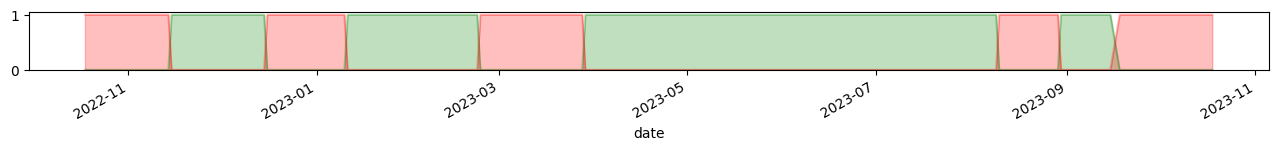

In [13]:
#Trends are either a Trend (1) or No Trend (0) depending on the Trend passed into *Trend Signals


long_trend = trendy.TS_Trends
short_trend = 1 - long_trend

long_trend.plot(figsize=(16, 0.85), kind="area", stacked=True, color=colors()[0], alpha=0.25) # Green Area
short_trend.plot(figsize=(16, 0.85), kind="area", stacked=True, color=colors()[1], alpha=0.25) # Red Area

<Axes: xlabel='date'>

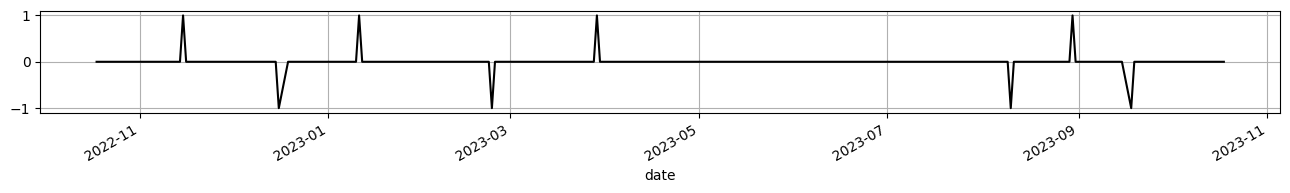

In [14]:
#The Trades are either Enter (1) or Exit (-1) or No Position/Action (0). These are based on the Trend passed into Trend Signals whether they are Long or Short Trends.


trendy.TS_Trades.plot(figsize=(16, 1.5), color=colors("BkBl")[0], grid=True)


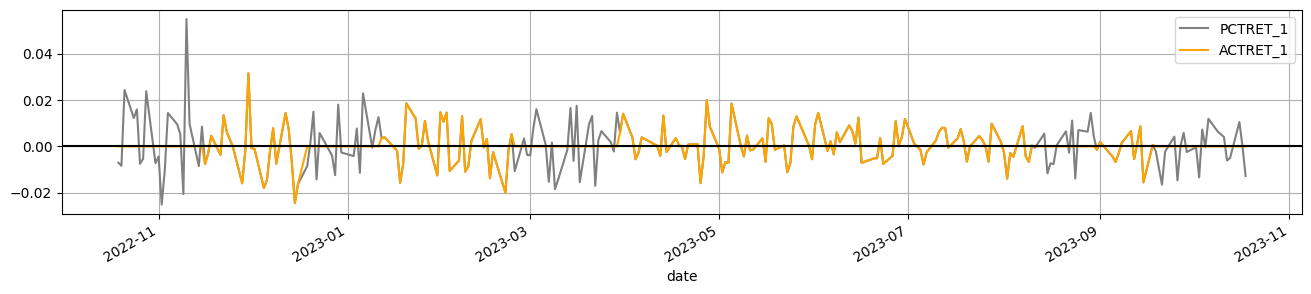

In [15]:
#Active Returns are returns made during the course of the Trend. They are simply the product of the returns and the Trend
asset["ACTRET_1"] = trendy.TS_Trends.shift(1) * asset.PCTRET_1
asset[["PCTRET_1", "ACTRET_1"]].plot(figsize=(16, 3), color=colors("GyOr"), alpha=1, grid=True).axhline(0, color="black")


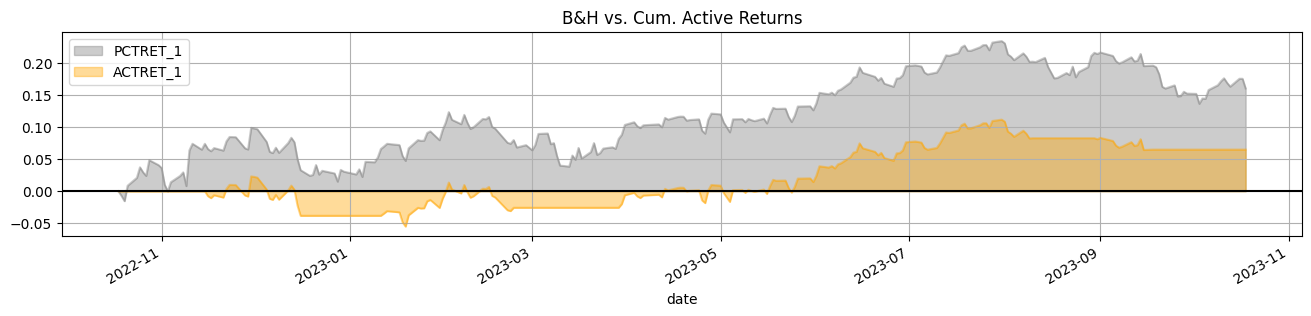

In [16]:
#Buy and Hold Returns (PCTRET_1) vs. Cum. Active Returns (ACTRET_1)
((asset[["PCTRET_1", "ACTRET_1"]] + 1).cumprod() - 1).plot(figsize=(16, 3), kind="area", stacked=False, color=colors("GyOr"), title="B&H vs. Cum. Active Returns", alpha=.4, grid=True).axhline(0, color="black")
